In [ ]:
#Important libraries
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
#Creating Features

features = ['Age','Annual Income (k$)','Spending Score (1-100)']

In [ ]:
df_new=df[features].copy()

In [ ]:
df_new

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
245,30,297,69
246,56,311,14
247,29,313,90
248,19,316,32


In [ ]:
df_new.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


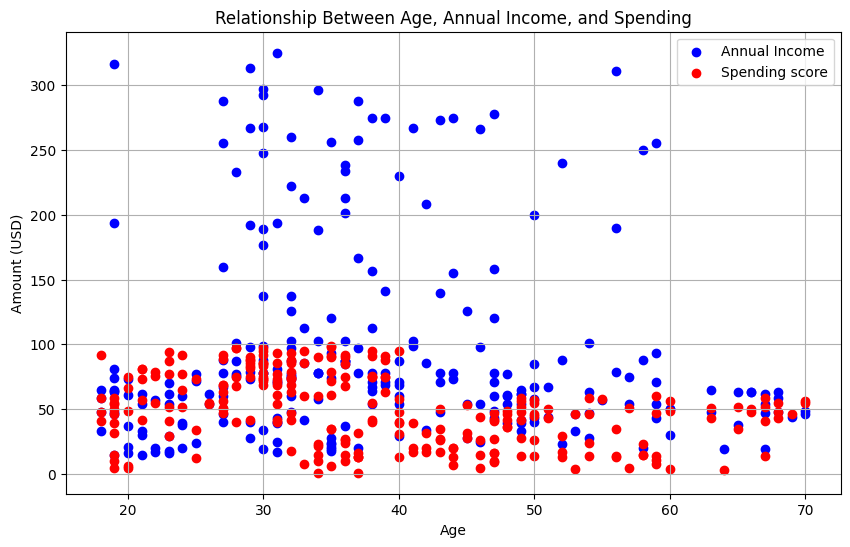

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_new['Age'], df_new['Annual Income (k$)'], color='blue', label='Annual Income')
plt.scatter(df_new['Age'], df_new['Spending Score (1-100)'], color='red', label='Spending score')

plt.xlabel('Age')
plt.ylabel('Amount (USD)')
plt.title('Relationship Between Age, Annual Income, and Spending')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Scaling the dataset

from sklearn.preprocessing import MinMaxScaler

In [ ]:
mm=MinMaxScaler()

In [ ]:
mm_df=mm.fit_transform(df_new)

In [ ]:
mm_df

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00322581, 0.05102041],
       [0.09615385, 0.00322581, 0.7755102 ],
       [0.25      , 0.00645161, 0.39795918],
       [0.07692308, 0.00645161, 0.76530612],
       [0.32692308, 0.00967742, 0.05102041],
       [0.09615385, 0.00967742, 0.94897959],
       [0.88461538, 0.01290323, 0.02040816],
       [0.23076923, 0.01290323, 0.7244898 ],
       [0.94230769, 0.01290323, 0.13265306],
       [0.32692308, 0.01290323, 1.        ],
       [0.76923077, 0.01612903, 0.14285714],
       [0.11538462, 0.01612903, 0.7755102 ],
       [0.36538462, 0.01612903, 0.12244898],
       [0.07692308, 0.01612903, 0.79591837],
       [0.32692308, 0.01935484, 0.34693878],
       [0.03846154, 0.01935484, 0.66326531],
       [0.65384615, 0.02580645, 0.28571429],
       [0.32692308, 0.02580645, 0.98979592],
       [0.32692308, 0.02903226, 0.34693878],
       [0.13461538, 0.02903226, 0.73469388],
       [0.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)
x_pca = pca.fit_transform(mm_df)

In [ ]:
x_pca

array([[-1.16936588e-01, -2.15977882e-01],
       [-4.30762370e-01, -2.83767481e-01],
       [ 1.59588671e-01, -1.62558657e-01],
       [-3.75403171e-01, -2.76707079e-01],
       [ 1.55104059e-02, -2.25293009e-01],
       [-3.79393938e-01, -2.70790470e-01],
       [ 3.35322339e-01, -1.73845995e-01],
       [-5.12482628e-01, -2.96829394e-01],
       [ 6.99945151e-01, -2.00115525e-01],
       [-2.53795419e-01, -2.67608629e-01],
       [ 6.46852073e-01, -2.20783772e-01],
       [-4.11891481e-01, -3.15558399e-01],
       [ 5.32784603e-01, -2.08569264e-01],
       [-3.64734444e-01, -2.65156348e-01],
       [ 3.02062695e-01, -1.80741757e-01],
       [-4.04301088e-01, -2.65918877e-01],
       [ 1.01592392e-01, -2.09482478e-01],
       [-3.23663779e-01, -2.40129496e-01],
       [ 3.49019289e-01, -2.13775274e-01],
       [-4.04942784e-01, -3.01272927e-01],
       [ 1.00780180e-01, -1.99936876e-01],
       [-3.21939132e-01, -2.47373605e-01],
       [ 4.70727263e-01, -1.62959041e-01],
       [-2.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(mm_df)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Deciding number of cluster to be used in kmeans

In [ ]:
import seaborn as sn

In [ ]:
import matplotlib.pyplot as pt

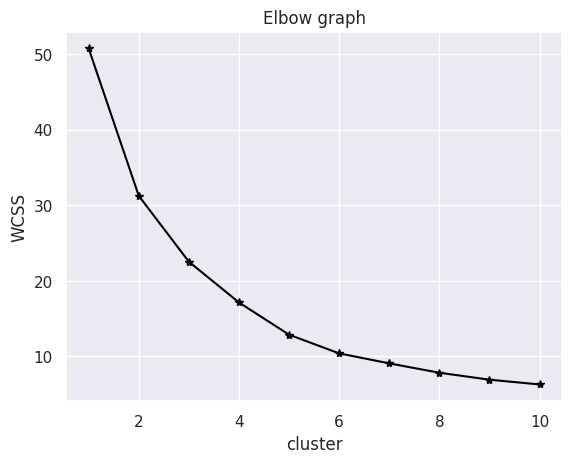

In [ ]:
sn.set()
pt.plot(range(1,11),wcss,marker='*',c='black')
pt.title('Elbow graph')
pt.xlabel('cluster')
pt.ylabel('WCSS')
pt.show()

Kmeans clustering using Euclidean distance

In [ ]:
#optimum number ofcluster is considered as 4
km1=KMeans(n_clusters=4,init='random',random_state=0)

km1.fit(x_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=4, random_state=0)

In [ ]:
cluster_centers_km1 = km1.cluster_centers_
cluster_centers_km1

array([[-0.26634949, -0.12308351],
       [ 0.27296556, -0.09698175],
       [-0.36489783,  0.44919097],
       [ 0.26964083,  0.47365427]])

In [ ]:
label1 = pd.Series(km1.labels_)

In [ ]:
label1

0      0
1      0
2      1
3      0
4      1
      ..
245    2
246    3
247    2
248    2
249    2
Length: 250, dtype: int32

In [ ]:
label1.value_counts()

1    104
0     98
3     24
2     24
Name: count, dtype: int64

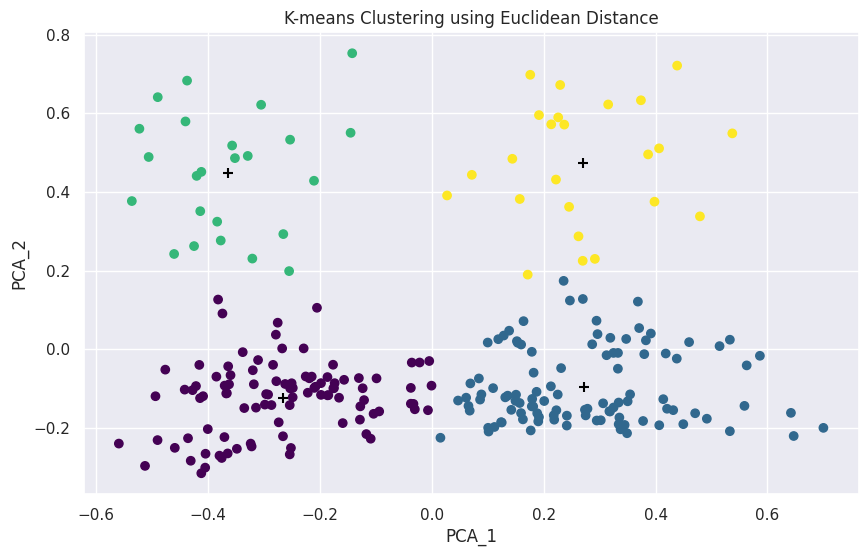

In [ ]:
pt.figure(figsize=(10, 6))
pt.scatter(x_pca[:,0], x_pca[:,1], c=label1, cmap='viridis')
pt.scatter(cluster_centers_km1[:, 0],cluster_centers_km1[:, 1], s=50, c='black', marker='+', label='Cluster Centers')
pt.xlabel('PCA_1')
pt.ylabel('PCA_2')
pt.title('K-means Clustering using Euclidean Distance')
pt.show()

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [ ]:
silhouette_eu = silhouette_score(x_pca, label1)
ch_score_eu = calinski_harabasz_score(x_pca, label1)

print("Silhouette Score:", silhouette_eu)
print("Calinski-Harabasz Index:", ch_score_eu)

Silhouette Score: 0.5593001409818946
Calinski-Harabasz Index: 357.88144817257165


Kmeans clustering using Manhattan distance

In [ ]:
# Manhattan distance : it is the measure of how apart the two data points are .
def man(X):
    return np.abs(X - np.mean(X, axis=0))

In [ ]:
data_man = man(x_pca)

km2 = KMeans(n_clusters=4,init='random',random_state=0)

km2.fit(data_man)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=4, random_state=0)

In [ ]:
cluster_centers_3 = km2.cluster_centers_
cluster_centers_3

array([[0.40772334, 0.24510369],
       [0.3522312 , 0.08530937],
       [0.31119547, 0.55473207],
       [0.14768787, 0.12197439]])

In [ ]:
label2=pd.Series(km2.labels_)

In [ ]:
label2

0      3
1      0
2      3
3      0
4      3
      ..
245    2
246    2
247    2
248    2
249    2
Length: 250, dtype: int32

In [ ]:
label2.value_counts()

3    97
1    72
0    50
2    31
Name: count, dtype: int64

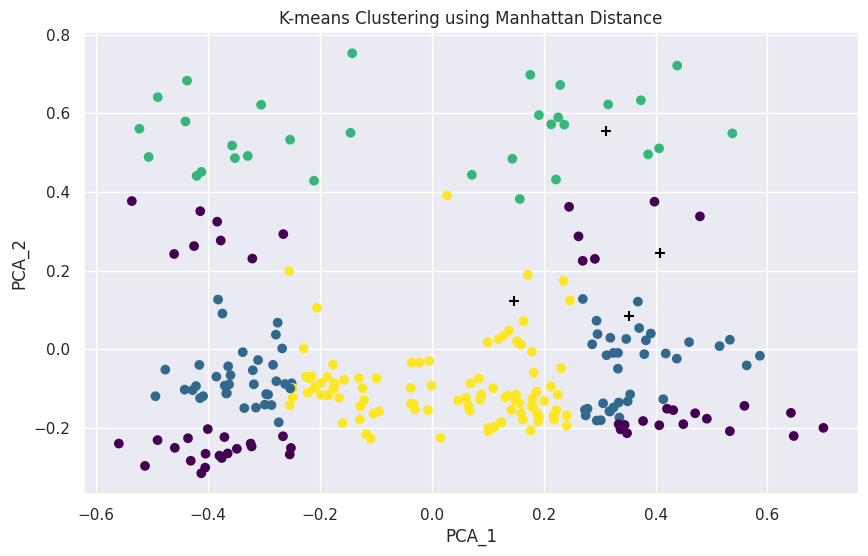

In [ ]:
pt.figure(figsize=(10, 6))
pt.scatter(x_pca[:,0], x_pca[:,1], c=label2, cmap='viridis')
pt.scatter(cluster_centers_3[:, 0],cluster_centers_3[:, 1], s=50, c='black', marker='+', label='Cluster Centers')
pt.xlabel('PCA_1')
pt.ylabel('PCA_2')
pt.title('K-means Clustering using Manhattan Distance')
pt.show()

In [ ]:
silhouette_man = silhouette_score(x_pca, label2)
ch_man = calinski_harabasz_score(x_pca, label2)

print("Silhouette Score:", silhouette_man)
print("Calinski-Harabasz Index:", ch_man)

Silhouette Score: 0.12749886076000383
Calinski-Harabasz Index: 31.59311818811189


Kmeans clustering using Cosine Similarity

In [ ]:
#Cosine similarity is a metric used to determine how similar two vectors are
#also it measure cosine angle between them.

from sklearn.metrics.pairwise import cosine_similarity

X_cosine = cosine_similarity(x_pca)

km3 = KMeans(n_clusters=4, init='k-means++', random_state=42, algorithm='elkan')

km3.fit(X_cosine)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(algorithm='elkan', n_clusters=4, random_state=42)

In [ ]:
label3=pd.Series(km3.labels_)

In [ ]:
label3

0      3
1      3
2      0
3      3
4      0
      ..
245    1
246    2
247    1
248    1
249    1
Length: 250, dtype: int32

In [ ]:
label3.value_counts()

0    98
3    94
2    30
1    28
Name: count, dtype: int64

yellow area:

There seem to be areas with concentrated yellow, suggesting clusters of data points with high cosine similarity This might indicate groups of data points sharing similar characteristics based on the chosen features.

Blue areas:

The blue areas represent data points with lower cosine similarity, indicating they are less similar directionally in the feature space.


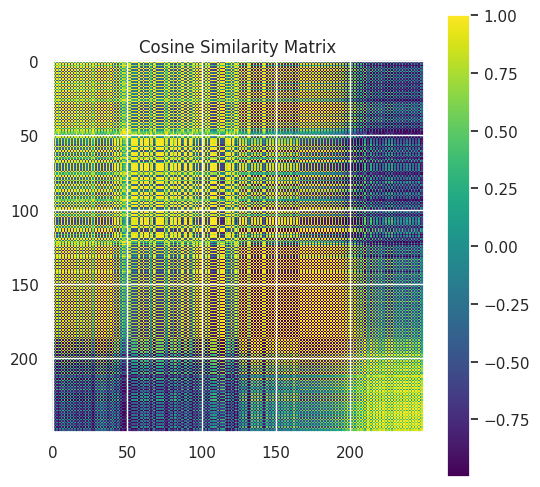

In [ ]:
# Compute cosine similarity matrix
cos_sim_matrix = np.dot(x_pca, x_pca.T) / (np.linalg.norm(x_pca, axis=1)[:, None] * np.linalg.norm(x_pca, axis=1))

# Plot cosine similarity matrix
pt.figure(figsize=(6, 6))
pt.imshow(cos_sim_matrix, cmap='viridis', interpolation='nearest')
pt.colorbar()
pt.title('Cosine Similarity Matrix')
pt.show()


In [ ]:
silhouette_cosine = silhouette_score(x_pca, label3)
ch_cosine = calinski_harabasz_score(x_pca, label3)

print("Silhouette Score:", silhouette_cosine)
print("Calinski-Harabasz Index:", ch_cosine)

Silhouette Score: 0.5271714516066327
Calinski-Harabasz Index: 325.999412929249


In [ ]:
tab={'Euclidean distance':{'Silhouette Score':silhouette_eu,'Calinski-Harabasz Index':ch_score_eu},
     'manhattan distance ':{'Silhouette Score':silhouette_man,'Calinski-Harabasz Index':ch_man},
     'Cosine similarity':{'Silhouette Score':silhouette_cosine,'Calinski-Harabasz Index':ch_cosine}}

In [ ]:
table=pd.DataFrame(tab)

In [ ]:
table

,Euclidean distance,manhattan distance,Cosine similarity
Silhouette Score,0.559300,0.127499,0.527171
Calinski-Harabasz Index,357.881448,31.593118,325.999413


In [ ]:
df_new

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
245,30,297,69
246,56,311,14
247,29,313,90
248,19,316,32


In [ ]:
labels1=pd.DataFrame(label1)
labels1.columns=['label']

In [ ]:
labels1

,label
0,0
1,0
2,1
3,0
4,1
...,...
245,2
246,3
247,2
248,2


In [ ]:
l1_df = pd.concat([labels1, df_new],axis=True)

In [ ]:
l1_df

,label,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,0,23,16,77
4,1,31,17,40
...,...,...,...,...
245,2,30,297,69
246,3,56,311,14
247,2,29,313,90
248,2,19,316,32


In [ ]:
l1_df['label'].value_counts()

label
1    104
0     98
3     24
2     24
Name: count, dtype: int64